## Assignment 4
K-means Clustering

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(7, 7)})

In [ ]:
class KMeans:
  def __init__(self, k):
    self.k = k

  def __distance(self, x, y):
    return (x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2

  def fit(self, points, centroids):
    prev_clusters = None
    clusters = [set() for _ in range(self.k)]

    while prev_clusters != clusters:
      prev_clusters = clusters
      for p in points:
        idx = 0
        for i in range(1, self.k):
          if self.__distance(p, centroids[i]) < self.__distance(p, centroids[idx]):
            idx = i
        clusters[idx].add(p)
      for i in range(self.k):
        centroids[i] = np.mean(list(clusters[i]), axis = 0)

    return clusters, centroids

In [ ]:
points = [
          (0.1, 0.6),
          (0.15, 0.71),
          (0.08,0.9),
          (0.16, 0.85),
          (0.2,0.3),
          (0.25,0.5),
          (0.24,0.1),
          (0.3,0.2)
]

### **BEFORE CLUSTERING**

In [ ]:
raw_df = pd.DataFrame()
x = [p[0] for p in points]
y = [p[1] for p in points]
raw_df['x'] = x
raw_df['y'] = y
raw_df

,x,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


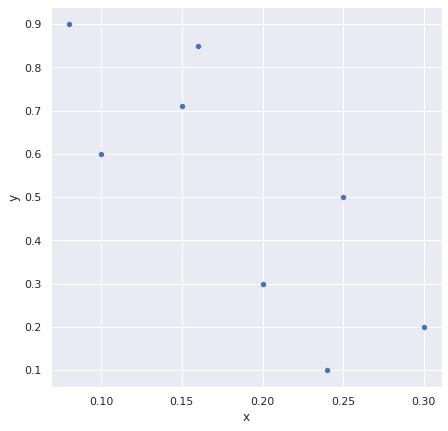

In [ ]:
sns.scatterplot(data = raw_df, x = 'x', y = 'y')

### **AFTER CLUSTERING**

In [ ]:
model = KMeans(2)

In [ ]:
clusters, centroids = model.fit(points, centroids = [(0.1, 0.6),(0.3,0.2)])

In [ ]:
clustered_df = pd.DataFrame()
x = []
y = []
category = []
for i in range(len(clusters)):
  for p in clusters[i]:
    x.append(p[0])
    y.append(p[1])
    category.append(f'{i}')
for c in centroids:
  x.append(c[0])
  y.append(c[1])
  category.append('Centroid')
clustered_df['x'] = x
clustered_df['y'] = y
clustered_df['category'] = category
clustered_df

,x,y,category
0,0.080000,0.900,0
1,0.160000,0.850,0
2,0.100000,0.600,0
3,0.150000,0.710,0
4,0.250000,0.500,0
5,0.200000,0.300,1
6,0.240000,0.100,1
7,0.300000,0.200,1
8,0.148000,0.712,Centroid
9,0.246667,0.200,Centroid


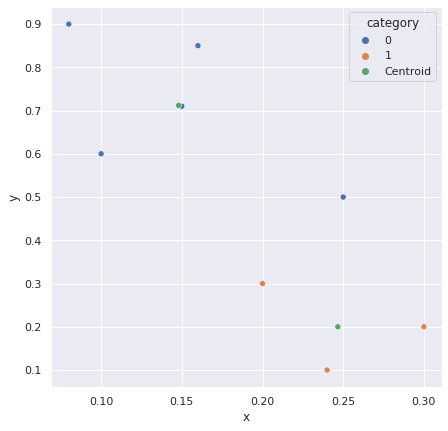

In [ ]:
sns.scatterplot(data = clustered_df, x = 'x', y = 'y', hue = 'category')